# Chapter 1: Basics of geological modeling with GemPy
***
In this first chapter, we will guide through the most important steps of modeling with GemPy on the base of a relatively simple geological model, while introducing essential objects and functions. We will illustrate how to:
- import and create input data for modeling in GemPy
- return and visualize input data
- generate a 3D geological model in GemPy
- visualize a model directly in GemPy
***
The final modeling results should look somewhat like this, depending on the type of visualization:

![2D and 3D visualizations of our example model.](../../../docs/readme_images/model_example_duo.png "2D and 3D visualizations of our example model")


In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
# just here as it is subfolder in experimental
os.pardir = '../..'

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

In [14]:
geo_model = gp.create_model('Model0')

In [15]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_model = gp.create_data([3496300, 3500200, 7510550, 7514450,-1500,500],resolution=[10,10,10], 
                        path_o = path_to_data + "model0_orientations.csv",
                        path_i = path_to_data + "model0_points.csv") 

Active grids: ['regular']


In [16]:
#data_path= '../'
#gp.init_data(geo_model, [3496300, 3500200, 7510550, 7514450,-1500,500],[10,10,10], 
#      path_i = data_path+"/input_data/model0_points.csv", path_o = data_path+"/input_data/model0_orientations.csv",default_values=True); #%%

In [17]:
gp.get_data(geo_model, 'surface_points').head() #to see order

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
0,3498947.536,7511205.00,216.891738,0.614296,0.318996,0.597356,Overburden,Default series,1,1,0.000001
1,3499105.544,7512650.19,225.544273,0.636393,0.521102,0.598566,Overburden,Default series,1,1,0.000001
2,3497796.033,7512150.19,193.525047,0.453261,0.451178,0.594089,Overburden,Default series,1,1,0.000001
3,3498449.498,7511750.12,201.201443,0.544647,0.395230,0.595162,Overburden,Default series,1,1,0.000001
4,3496999.182,7510800.05,216.613121,0.341823,0.262364,0.597317,Overburden,Default series,1,1,0.000001


In [18]:
gp.map_series_to_surfaces(geo_model,
                            {"OVB_Series": ('Overburden'), "UPXO_Series": ('Olivine Pyroxenite'), "Basement_Series" :('Basement')}, remove_unused_series=True);

In [19]:
geo_model.surfaces #set_order_formations??

,surface,series,order_surfaces,isBasement,color,id
1,Olivine_Pyroxenite,Default series,1,False,#9f0052,1
0,Overburden,OVB_Series,1,False,#015482,2
2,basement,Basement,1,True,#ffbe00,3


In [20]:
geo_model.series

,order_series,BottomRelation
Default series,1,Erosion
OVB_Series,2,Erosion
Basement,3,Erosion


In [21]:
geo_model.grid.values

array([[ 3.496495e+06,  7.510745e+06, -1.400000e+03],
       [ 3.496495e+06,  7.510745e+06, -1.200000e+03],
       [ 3.496495e+06,  7.510745e+06, -1.000000e+03],
       ...,
       [ 3.500005e+06,  7.514255e+06,  0.000000e+00],
       [ 3.500005e+06,  7.514255e+06,  2.000000e+02],
       [ 3.500005e+06,  7.514255e+06,  4.000000e+02]])

In [22]:
#FOR SECTION
geo_model.grid.set_section_grid({"E5": ([3497244,7509822], #first point xy
                                           [3499717, 7513578],
                                           [100,100])}) # resolution 

,start,stop,resolution,dist
E5,"[3497244, 7509822]","[3499717, 7513578]","[100, 100]",4497.028463


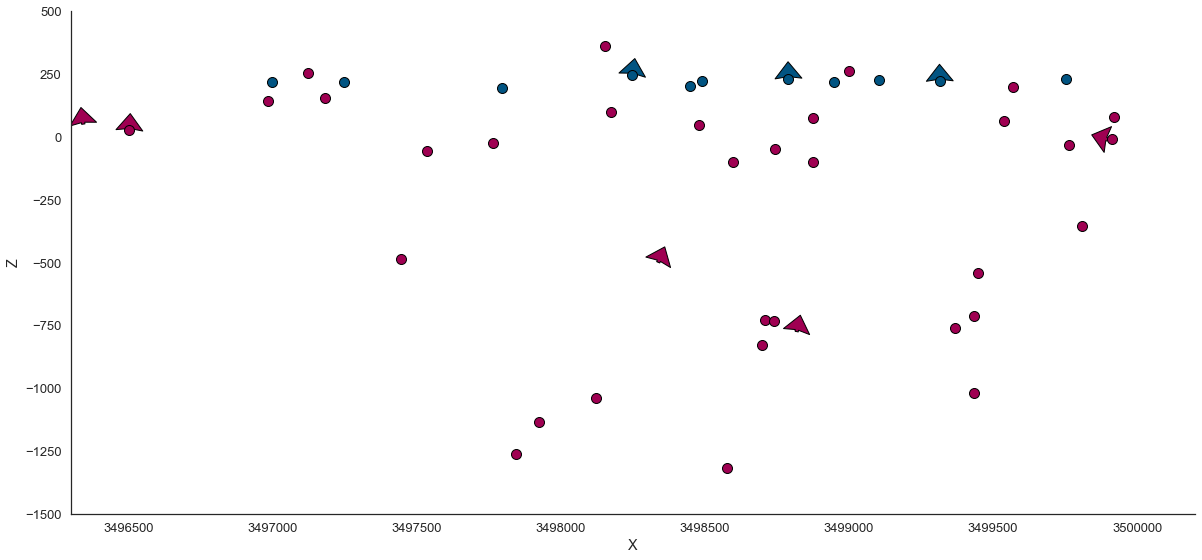

In [23]:
#geo_model.set_is_fault(['Fault_Series'])
%matplotlib inline
gp.plot.plot_data(geo_model, cell_number=0, direction='y');

In [24]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])


Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [25]:
geo_model.additional_data.structure_data

,values
isLith,True
isFault,False
number faults,0
number surfaces,2
number series,3
number surfaces per series,"[1, 1, 0]"
len surfaces surface_points,"[32, 11]"
len series surface_points,"[32, 11, 0]"
len series orientations,"[5, 3, 0]"


In [29]:
sol = gp.compute_model(geo_model, compute_mesh=False)

<Figure size 1080x1080 with 0 Axes>

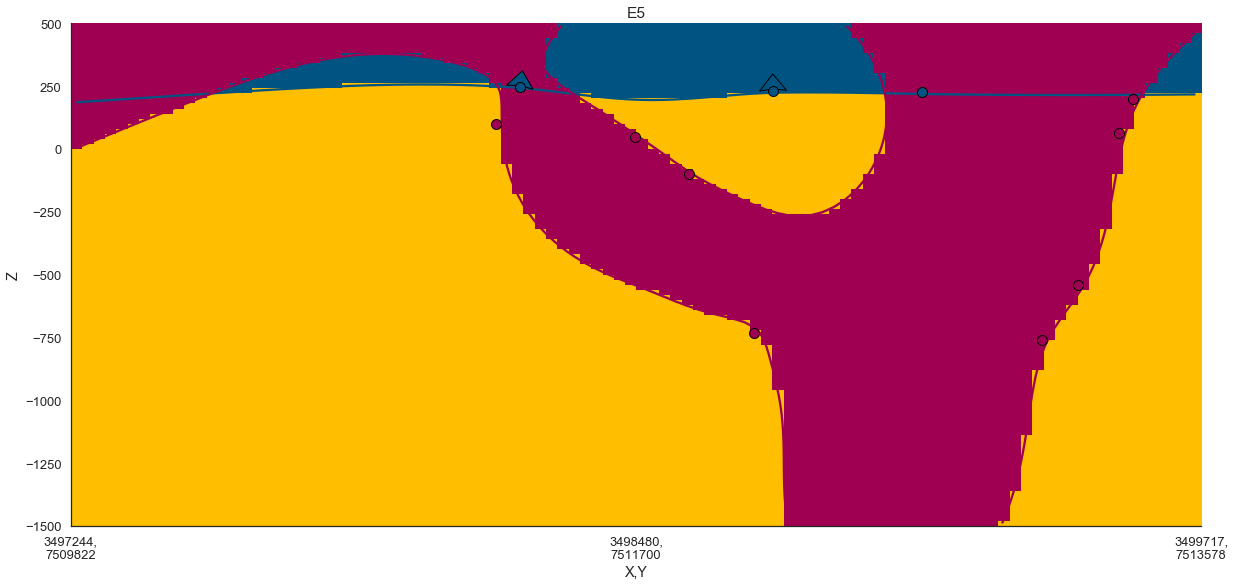

In [30]:
plt.figure(figsize=(15,15))
gp.plot.plot_section_by_name(geo_model, "E5")
plt.savefig('Model0')

#%matplotlib inline
#gp.plot.plot_data(geo_model, direction='y');

In [28]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
1,Olivine_Pyroxenite,Default series,1,False,#9f0052,1
0,Overburden,OVB_Series,1,False,#015482,2
2,basement,Basement,1,True,#ffbe00,3


### Direct model visualization in GemPy

Model solutions can be easily visualized in 2D sections in GemPy directly. Let's take a look at our lithology block:

In [ ]:
gp.compute_model(geo_model, compute_mesh=False)

In [ ]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=0,
                     direction='y', show_data=True) #cell_nonumber of cells in direction=..

In [ ]:
geo_model.surfaces

### Save the model

GemPy uses  Python [pickle] for fast storing temporary objects (https://docs.python.org/3/library/pickle.html). However, module version consistency is required. For loading a pickle into GemPy, you have to make sure that you are using the same version of pickle and dependent modules (e.g.: `Pandas`, `NumPy`) as were used when the data was originally stored.

For long term-safer storage we can export the `pandas.DataFrames` to csv by using:

In [ ]:
gp.save_model(geo_model, path=data_path+'/data/gempy_models')

In [ ]:
from gempy.core.grid_modules.grid_types import CenteredGrid